# Running sounds through Keras graphs

In this tutorial, we run sounds through different activations to get an idea how they behave.

In [1]:
import IPython

In [2]:
import keras
from pydub import AudioSegment
from keras.models import Sequential, Model
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Input, Dense, UpSampling1D, Conv1D, Activation, Reshape, Flatten
import numpy as np
from playsound import save_sound
from audio_loader import load_all

latent_dim = 100

#sound = AudioSegment.from_wav("input/speech_commands/bird/0a7c2a8d_nohash_1.wav")
sound = load_all("categorized", "cat",forceLoad=True)

path = save_sound(sound, "endtoend", "original", upscale=False, index=1)
print(path)
IPython.display.Audio(filename=path)

Using TensorFlow backend.
/Users/Lassi/Documents/Git/AudioMNIST/notebook/notebookenv/lib/python3.6/site-packages/pydub/utils.py:187: RuntimeWarning: Couldn't find ffplay or avplay - defaulting to ffplay, but may not work
  warn("Couldn't find ffplay or avplay - defaulting to ffplay, but may not work", RuntimeWarning)


x_train shape: (40, 220500, 1)
40 train samples
Saving arrays to file


<Figure size 3000x1000 with 1 Axes>

saving sound from category original folder endtoend
output/endtoend/original#0.wav


(220500, 1)


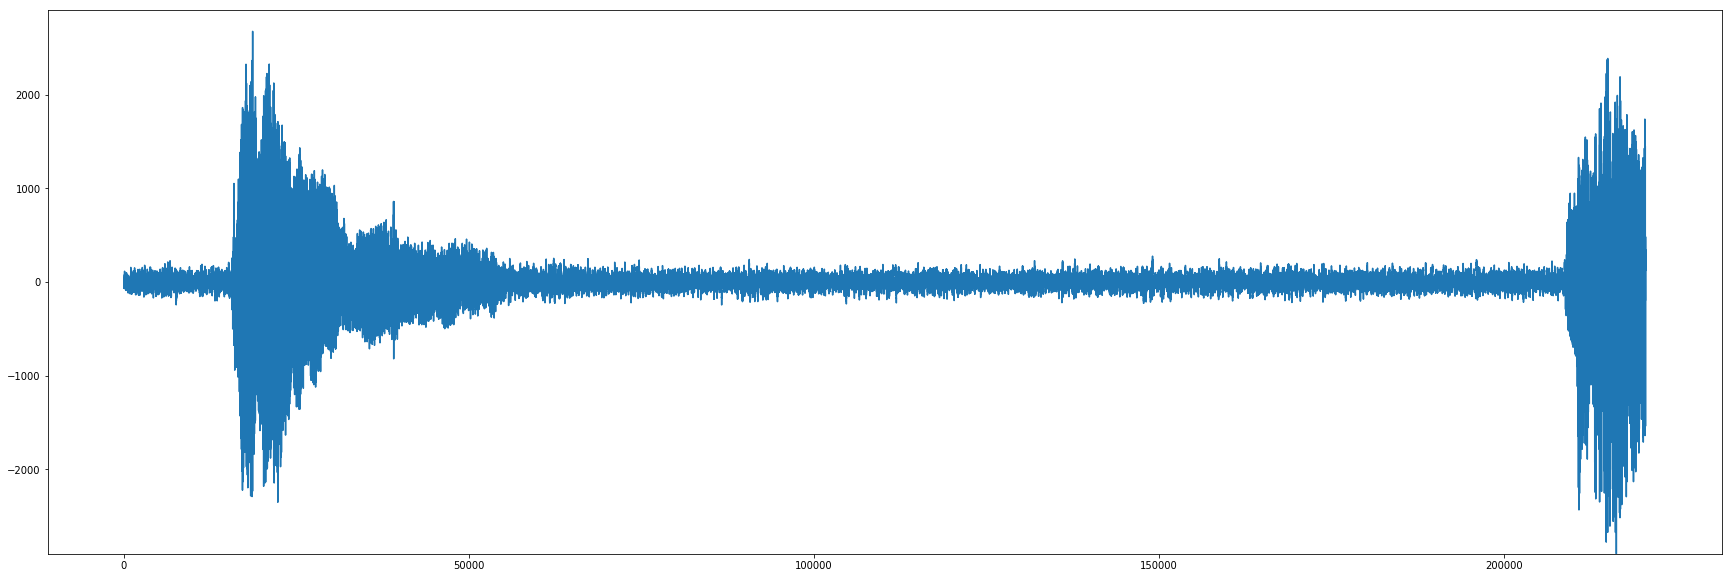

saving sound from category normalized folder endtoend
(1, 220500)


In [3]:
sound = sound / 65536
sound = sound + 0.5
target = np.array(sound[0])
print(target.shape)
path = save_sound(sound, "endtoend", "normalized", upscale=True, index=0)
IPython.display.Audio(filename=path)

input_shape = (1,target.shape[0])
print(input_shape)

x_train shape: (40, 220500, 1)
40 train samples
Saving arrays to file


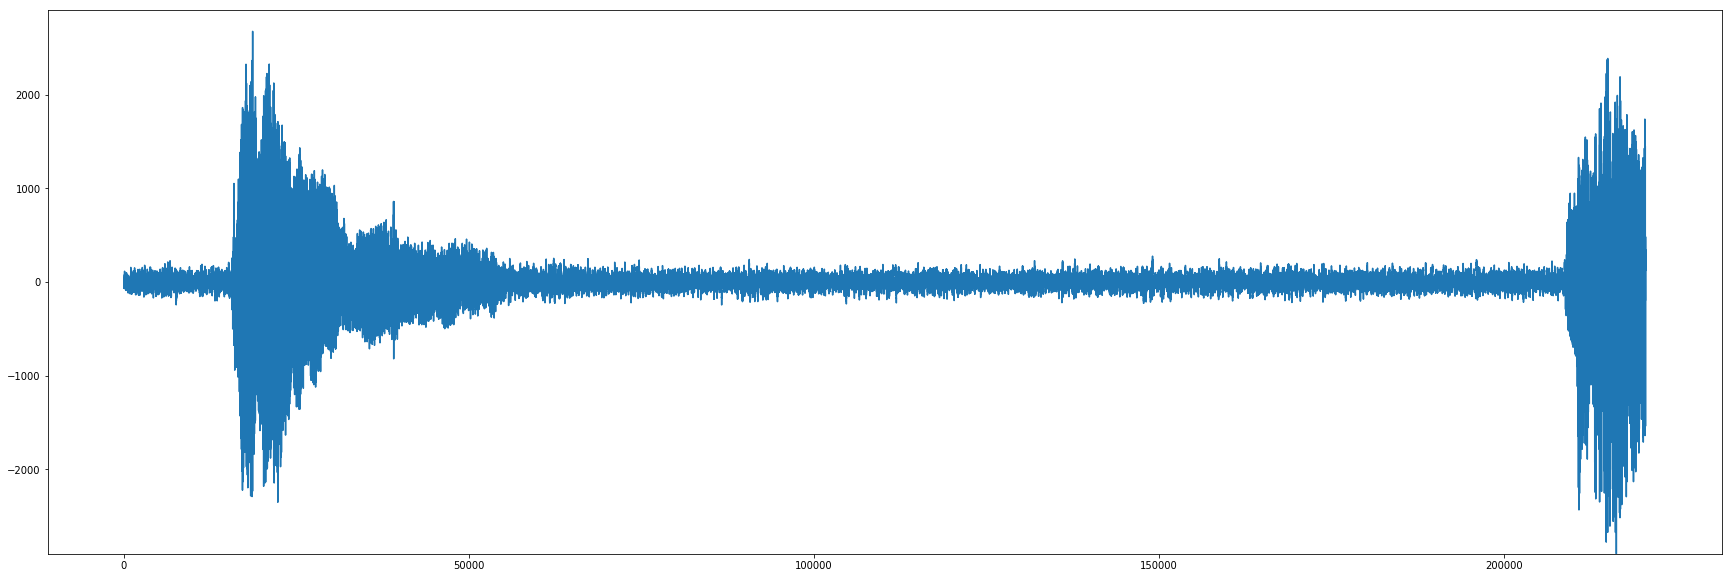

saving sound from category uunormalized folder endtoend


In [4]:
sound = load_all("categorized", "cat",forceLoad=True)
target = np.array(sound[0])
path = save_sound(sound, "endtoend", "uunormalized", upscale=False, index=0)
IPython.display.Audio(filename=path)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
activation_1 (Activation)    (None, 1, 220500)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


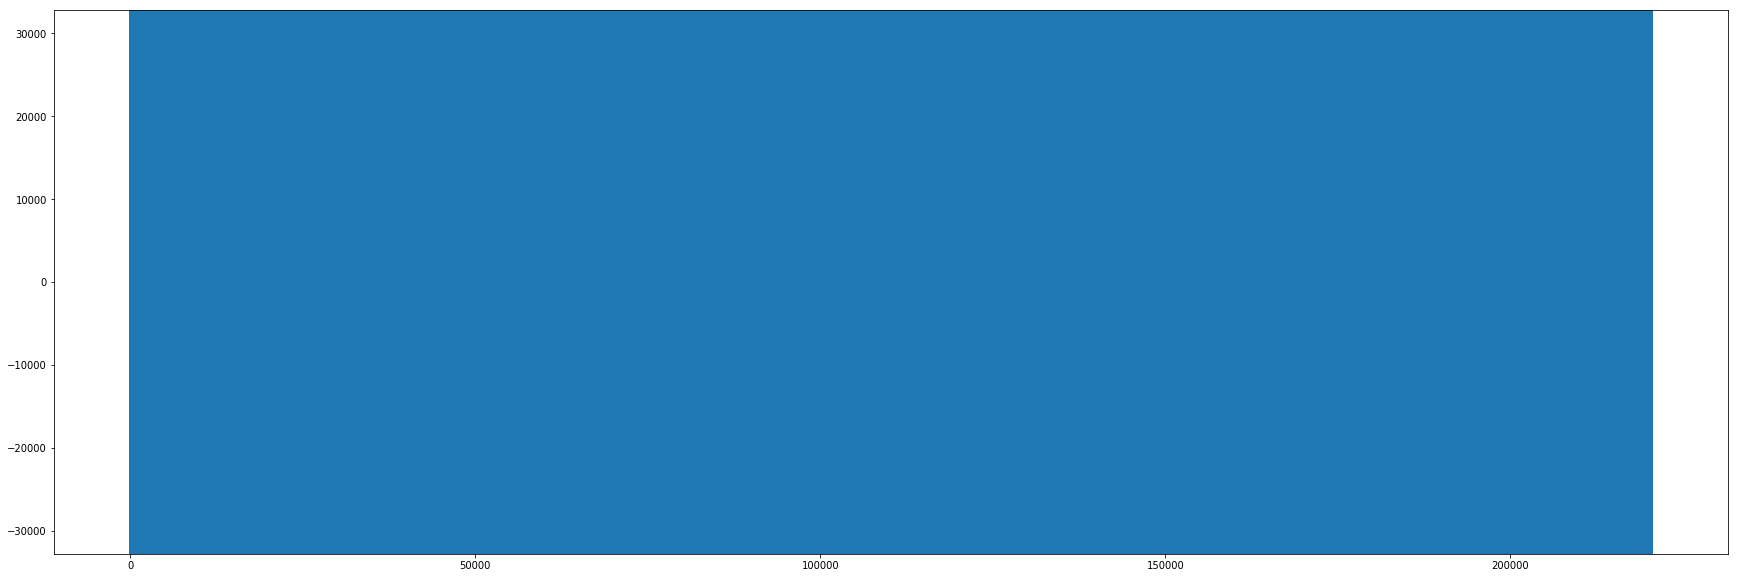

saving sound from category reluactivatedx6 folder endtoend


In [5]:
model = Sequential()

model.add(Activation("tanh", input_shape=input_shape))

model.summary()

noise = Input(shape=(len(sound[0]),))
clip = model(noise)

generator = Model(noise, clip)

target = target.reshape(target.shape[1], target.shape[0])
gen_clip = generator.predict(target, 1)

path = save_sound(gen_clip, "endtoend", "reluactivatedx6", upscale=True)
IPython.display.Audio(filename=path)

What happens is that tanh sets everything positive effectively to max positive and anything negative to max negative. It's remarkable how it still sounds like the original at all.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
activation_3 (Activation)    (None, 1, 220500)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


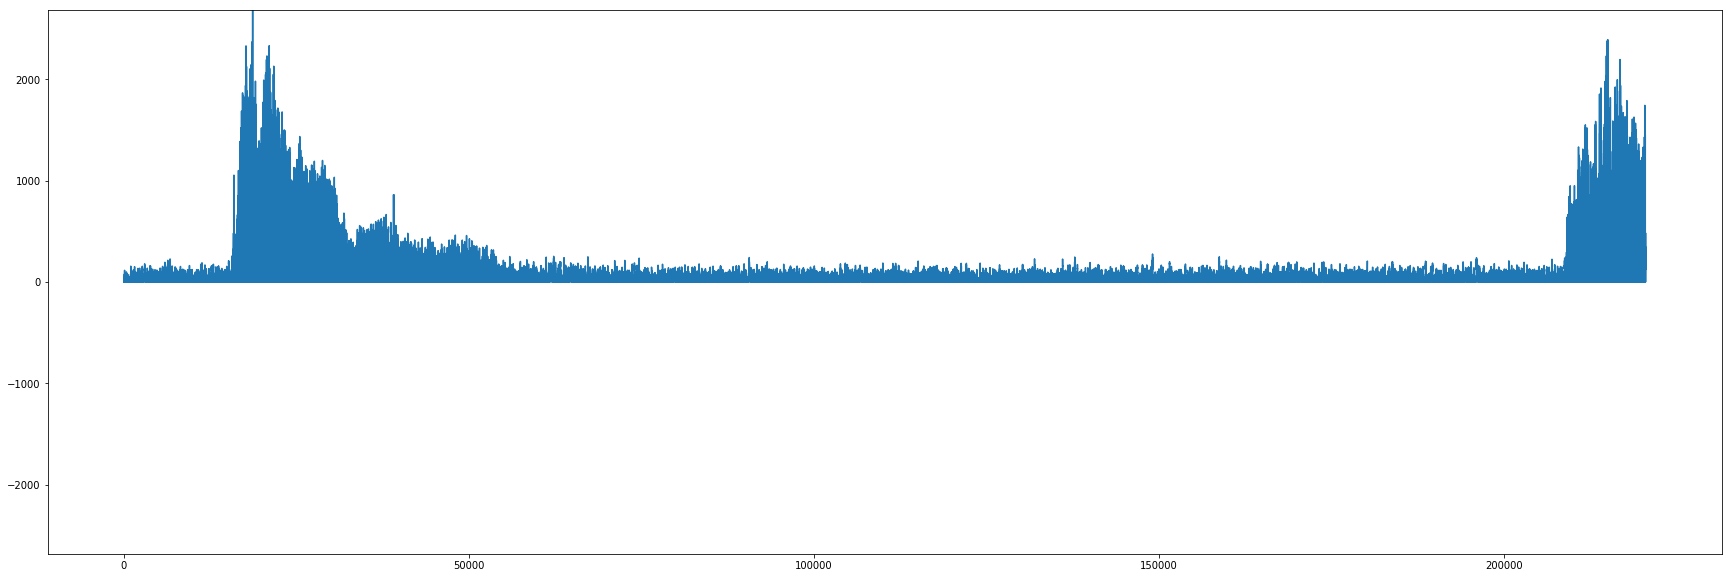

saving sound from category reluactivatedx6 folder endtoend


In [7]:
model = Sequential()

model.add(Activation("relu", input_shape=input_shape))

model.summary()

noise = Input(shape=(len(sound[0]),))
clip = model(noise)

generator = Model(noise, clip)

target = target.reshape(target.shape[1], target.shape[0])
gen_clip = generator.predict(target, 1)

path = save_sound(gen_clip, "endtoend", "reluactivatedx6", upscale=False)
IPython.display.Audio(filename=path)

In [ ]:
# code source: https://schwalbe10.github.io/thinkage/2017/02/12/activation.html
import numpy as np
import matplotlib.pylab as plt


def step(x):
    return np.array(x > 0, dtype=np.int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y_step = step(x)
y_sigmoid = sigmoid(x)
y_relu = relu(x)

plt.plot(x, y_step, label='Step', color='k', lw=1, linestyle=None)
plt.plot(x, y_sigmoid, label='Sigmoid', color='k', lw=1, ls='--')
plt.plot(x, y_relu, label='ReLU', color='k', lw=1, linestyle='-.')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

Relu on the other hand only retains positive values.

What we see is that with bad normalization of data, we can end up with something pretty horrible. But with proper normalization the activation functions don't really change anything without weights.

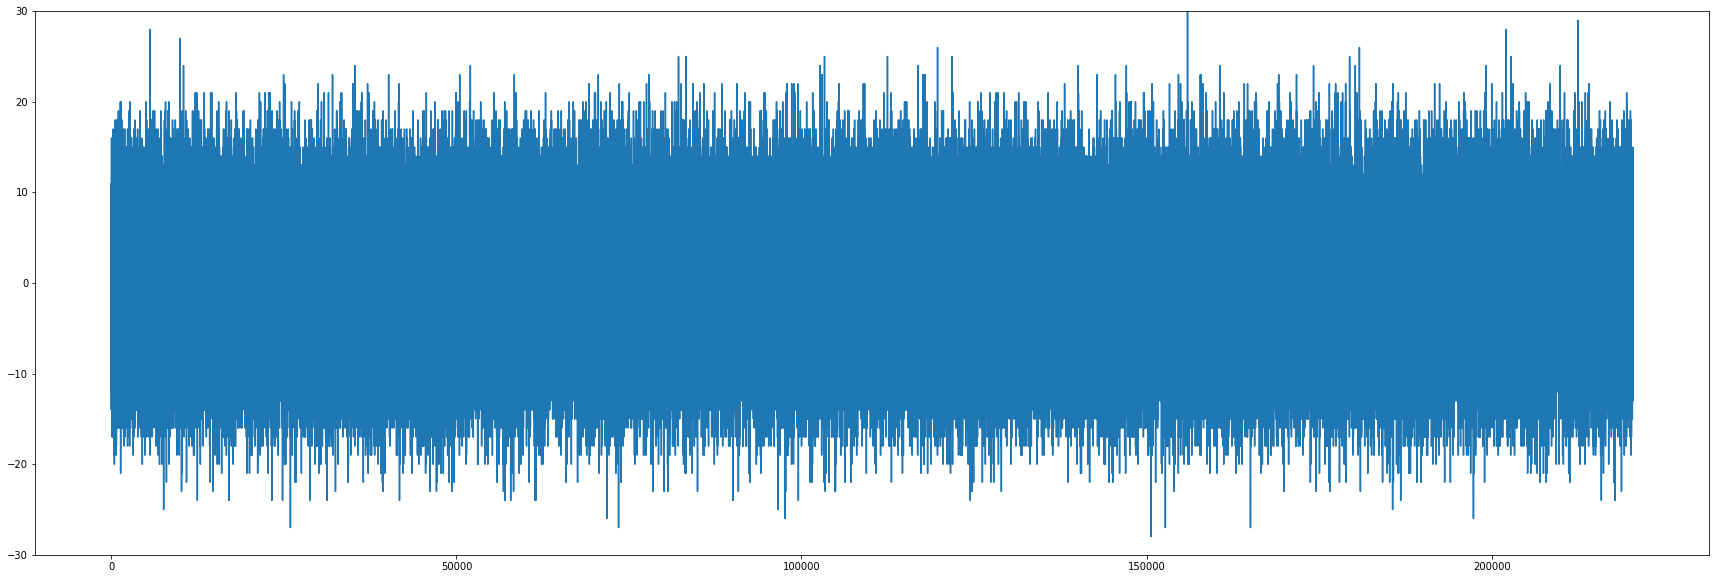

saving sound from category reluactivatedx6 folder endtoend


In [9]:
model = Sequential()

model.add(Activation("relu", input_shape=input_shape))
model.add(Dense(32))
model.add(Dense(64))
model.add(Dense(220500))

#model.summary()

noise = Input(shape=(len(sound[0]),))
clip = model(noise)

generator = Model(noise, clip)

target = target.reshape(target.shape[1], target.shape[0])
gen_clip = generator.predict(target, 1)

path = save_sound(gen_clip, "endtoend", "reluactivatedx6", upscale=False)
IPython.display.Audio(filename=path)

This shows the inital state of Keras's (Tensorflow's) initialization function. It ends with very little noise. (Note the y-axis.